In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from util import bullish_sequence, bullish_candlestick_patterns, time_formatter
from src.asset_selector import AssetSelector
from src.indicator_collection import IndicatorCollection
from src.predictor import Predictor
from sklearn.cluster import KMeans
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import configparser
import pandas as pd
import numpy as np
import time
import sys
import os

py.init_notebook_mode(connected=True)
config = configparser.ConfigParser()

try:
    config.read(os.path.relpath("config.ini"))
except FileExistsError as e:
    print("FileExistsError: {}".format(e))
    sys.exit(1)


alpaca_api = tradeapi.REST(
    base_url    = config["alpaca"]["APCA_API_BASE_URL"],
    key_id      = config["alpaca"]["APCA_API_KEY_ID"],
    secret_key  = config["alpaca"]["APCA_API_SECRET_KEY"],
    api_version = config["alpaca"]["VERSION"]
)

tq_key = config["tenquant"]["api_key"]

In [3]:
sa          = AssetSelector(alpaca_api, edgar_token=None)
assets      = sa.bullish_candlesticks(64, 20)

Ticker: ALEX		Poolsize: 20		Result Length: 1
Ticker: USNA		Poolsize: 20		Result Length: 2
Ticker: MSCI		Poolsize: 20		Result Length: 3
Ticker: WD		Poolsize: 20		Result Length: 4
Ticker: RFL		Poolsize: 20		Result Length: 5
Ticker: CPLG		Poolsize: 20		Result Length: 6
Ticker: STNG		Poolsize: 20		Result Length: 7
Ticker: MMM		Poolsize: 20		Result Length: 8
Ticker: FIS		Poolsize: 20		Result Length: 9
Ticker: MGEE		Poolsize: 20		Result Length: 10
Ticker: ETH		Poolsize: 20		Result Length: 11
Ticker: MWA		Poolsize: 20		Result Length: 12
Ticker: SMM		Poolsize: 20		Result Length: 13
Ticker: PAYC		Poolsize: 20		Result Length: 14
Ticker: PFIS		Poolsize: 20		Result Length: 15
Ticker: MYOK		Poolsize: 20		Result Length: 16
Ticker: ZUO		Poolsize: 20		Result Length: 17
Ticker: CONE		Poolsize: 20		Result Length: 18
Ticker: SCHC		Poolsize: 20		Result Length: 19
Ticker: NUVA		Poolsize: 20		Result Length: 20


In [4]:
indicators  = IndicatorCollection(alpaca_api, assets).get_cluster()

In [5]:
predictions = Predictor(indicators)

In [6]:
# get the first tradeable asset in the collection of indicators
ticker_index = list(indicators.keys())[0]


In [7]:
indicators[ticker_index].iloc[-20:].to_csv()

',time,open,high,low,close,volume,up_move,down_move,DMp,DMm,ticker,bb_up,bb_mid,bb_low,macd,signal,vwmacd,vwsignal,mfi,stoch,vzo,adx,apz_u,apz_l,bb_up_ptc,bb_mid_ptc,bb_low_ptc,macd_ptc,signal_ptc,vwmacd_ptc,vwsignal_ptc,mfi_ptc,stoch_ptc,vzo_ptc,adx_ptc,apz_u_ptc,apz_l_ptc\n43,2019-10-07 00:00:00-04:00,24.39,24.71,24.27,24.39,119165,0.21000000000000085,-0.0799999999999983,0.21000000000000085,0.0,ALEX,25.107481149367704,24.5435,23.9795188506323,0.18634992796325633,0.2651467561594092,0.1428452475276032,0.2174509305911412,46.73297446119653,40.67796610169496,17.94110358016944,,25.546028138653575,23.725590469173753,-0.004940895530523348,0.0018368471539074172,0.009033064593988671,-0.08061616835272845,-0.0691617843142106,-0.07867926665660585,-0.07900213533161093,-0.09965949225720405,-0.020408163265302037,-0.4246967220264378,,-0.0006519783839010751,-0.0004925639568807982\n44,2019-10-08 00:00:00-04:00,24.33,24.43,24.03,24.23,130183,-0.28000000000000114,0.23999999999999844,0.0,0.239999999999998

In [8]:
kmeans = KMeans(n_clusters=2)

In [9]:
n_indicators                = pd.DataFrame()
n_indicators["open"]        = indicators[ticker_index]["open"].iloc[-20:]
n_indicators["high"]        = indicators[ticker_index]["high"].iloc[-20:]
n_indicators["low"]         = indicators[ticker_index]["low"].iloc[-20:]
n_indicators["close"]       = indicators[ticker_index]["close"].iloc[-20:]
n_indicators["macd"]        = indicators[ticker_index]["macd"].iloc[-20:]
n_indicators["signal"]      = indicators[ticker_index]["signal"].iloc[-20:]
n_indicators["mfi"]         = indicators[ticker_index]["mfi"].iloc[-20:]
n_indicators["bb_up"]       = indicators[ticker_index]["bb_up"].iloc[-20:]
n_indicators["bb_low"]      = indicators[ticker_index]["bb_low"].iloc[-20:]
n_indicators["vzo"]         = indicators[ticker_index]["vzo"].iloc[-20:]
n_indicators["apz_u"]       = indicators[ticker_index]["apz_u"].iloc[-20:]
n_indicators["apz_l"]       = indicators[ticker_index]["apz_l"].iloc[-20:]
n_indicators["stoch"]       = indicators[ticker_index]["stoch"].iloc[-20:]

n1_indicators               = pd.DataFrame()
ticker_index                = list(indicators.keys())[1]

n1_indicators["open"]       = indicators[ticker_index]["open"].iloc[-20:]
n1_indicators["high"]       = indicators[ticker_index]["high"].iloc[-20:]
n1_indicators["low"]        = indicators[ticker_index]["low"].iloc[-20:]
n1_indicators["close"]      = indicators[ticker_index]["close"].iloc[-20:]
n1_indicators["macd"]       = indicators[ticker_index]["macd"].iloc[-20:]
n1_indicators["signal"]     = indicators[ticker_index]["signal"].iloc[-20:]
n1_indicators["mfi"]        = indicators[ticker_index]["mfi"].iloc[-20:]
n1_indicators["bb_up"]      = indicators[ticker_index]["bb_up"].iloc[-20:]
n1_indicators["bb_low"]     = indicators[ticker_index]["bb_low"].iloc[-20:]
n1_indicators["vzo"]        = indicators[ticker_index]["vzo"].iloc[-20:]
n1_indicators["apz_u"]      = indicators[ticker_index]["apz_u"].iloc[-20:]
n1_indicators["apz_l"]      = indicators[ticker_index]["apz_l"].iloc[-20:]
n1_indicators["stoch"]      = indicators[ticker_index]["stoch"].iloc[-20:]

n2_indicators               = pd.DataFrame()
ticker_index                = list(indicators.keys())[2]

n2_indicators["open"]       = indicators[ticker_index]["open"].iloc[-20:]
n2_indicators["high"]       = indicators[ticker_index]["high"].iloc[-20:]
n2_indicators["low"]        = indicators[ticker_index]["low"].iloc[-20:]
n2_indicators["close"]      = indicators[ticker_index]["close"].iloc[-20:]
n2_indicators["macd"]       = indicators[ticker_index]["macd"].iloc[-20:]
n2_indicators["signal"]     = indicators[ticker_index]["signal"].iloc[-20:]
n2_indicators["mfi"]        = indicators[ticker_index]["mfi"].iloc[-20:]
n2_indicators["bb_up"]      = indicators[ticker_index]["bb_up"].iloc[-20:]
n2_indicators["bb_low"]     = indicators[ticker_index]["bb_low"].iloc[-20:]
n2_indicators["vzo"]        = indicators[ticker_index]["vzo"].iloc[-20:]
n2_indicators["apz_u"]      = indicators[ticker_index]["apz_u"].iloc[-20:]
n2_indicators["apz_l"]      = indicators[ticker_index]["apz_l"].iloc[-20:]
n2_indicators["stoch"]      = indicators[ticker_index]["stoch"].iloc[-20:]

n3_indicators               = pd.DataFrame()
ticker_index                = list(indicators.keys())[3]

n3_indicators["open"]       = indicators[ticker_index]["open"].iloc[-20:]
n3_indicators["high"]       = indicators[ticker_index]["high"].iloc[-20:]
n3_indicators["low"]        = indicators[ticker_index]["low"].iloc[-20:]
n3_indicators["close"]      = indicators[ticker_index]["close"].iloc[-20:]
n3_indicators["macd"]       = indicators[ticker_index]["macd"].iloc[-20:]
n3_indicators["signal"]     = indicators[ticker_index]["signal"].iloc[-20:]
n3_indicators["mfi"]        = indicators[ticker_index]["mfi"].iloc[-20:]
n3_indicators["bb_up"]      = indicators[ticker_index]["bb_up"].iloc[-20:]
n3_indicators["bb_low"]     = indicators[ticker_index]["bb_low"].iloc[-20:]
n3_indicators["vzo"]        = indicators[ticker_index]["vzo"].iloc[-20:]
n3_indicators["apz_u"]      = indicators[ticker_index]["apz_u"].iloc[-20:]
n3_indicators["apz_l"]      = indicators[ticker_index]["apz_l"].iloc[-20:]
n3_indicators["stoch"]      = indicators[ticker_index]["stoch"].iloc[-20:]

n4_indicators               = pd.DataFrame()
ticker_index                = list(indicators.keys())[4]

n4_indicators["open"]       = indicators[ticker_index]["open"].iloc[-20:]
n4_indicators["high"]       = indicators[ticker_index]["high"].iloc[-20:]
n4_indicators["low"]        = indicators[ticker_index]["low"].iloc[-20:]
n4_indicators["close"]      = indicators[ticker_index]["close"].iloc[-20:]
n4_indicators["macd"]       = indicators[ticker_index]["macd"].iloc[-20:]
n4_indicators["signal"]     = indicators[ticker_index]["signal"].iloc[-20:]
n4_indicators["mfi"]        = indicators[ticker_index]["mfi"].iloc[-20:]
n4_indicators["bb_up"]      = indicators[ticker_index]["bb_up"].iloc[-20:]
n4_indicators["bb_low"]     = indicators[ticker_index]["bb_low"].iloc[-20:]
n4_indicators["vzo"]        = indicators[ticker_index]["vzo"].iloc[-20:]
n4_indicators["apz_u"]      = indicators[ticker_index]["apz_u"].iloc[-20:]
n4_indicators["apz_l"]      = indicators[ticker_index]["apz_l"].iloc[-20:]
n4_indicators["stoch"]      = indicators[ticker_index]["stoch"].iloc[-20:]

In [10]:
kmeans.fit(n_indicators)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.cluster_centers_

array([[24.21461538, 24.39153846, 23.99846154, 24.16923077,  0.09222234,
         0.16364968, 52.9021752 , 25.06622927, 23.86269381,  7.28957833,
        25.40492822, 23.66939301, 30.89800403],
       [24.74285714, 25.        , 24.59871429, 24.76714286,  0.13916457,
         0.12634678, 71.40552136, 25.02183649, 23.80702066, 48.54378785,
        25.47039512, 23.73615938, 67.33668192]])

In [12]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

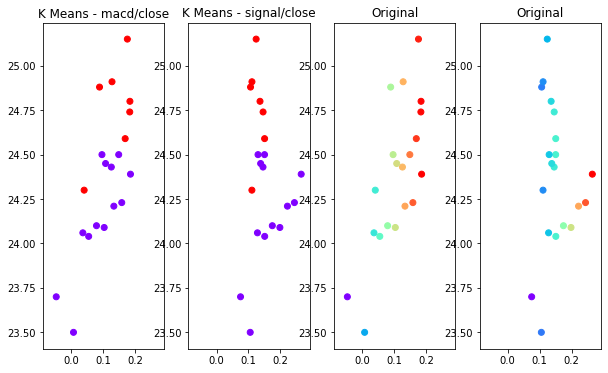

In [13]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=False, figsize=(10,6))
ax1.set_title('K Means - macd/close')
ax1.scatter(n_indicators["macd"], n_indicators["close"], c=kmeans.labels_, cmap="rainbow")
ax2.set_title("K Means - signal/close")
ax2.scatter(n_indicators["signal"], n_indicators["close"], c=kmeans.labels_, cmap="rainbow")
ax3.set_title("Original")
ax3.scatter(n_indicators["macd"], n_indicators["close"], c=n_indicators["macd"], cmap="rainbow")
ax4.set_title("Original")
ax4.scatter(n_indicators["signal"], n_indicators["close"], c=n_indicators["signal"], cmap="rainbow")

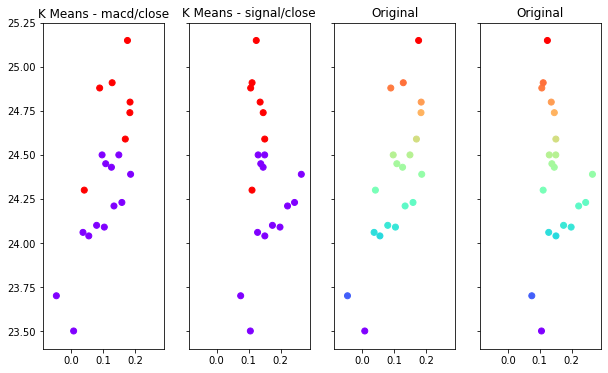

In [14]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(10,6))
ax1.set_title('K Means - macd/close')
ax1.scatter(n_indicators["macd"], n_indicators["close"], c=kmeans.labels_, cmap="rainbow")
ax2.set_title("K Means - signal/close")
ax2.scatter(n_indicators["signal"], n_indicators["close"], c=kmeans.labels_, cmap="rainbow")
ax3.set_title("Original")
ax3.scatter(n_indicators["macd"], n_indicators["close"], c=n_indicators["close"], cmap="rainbow")
ax4.set_title("Original")
ax4.scatter(n_indicators["signal"], n_indicators["close"], c=n_indicators["close"], cmap="rainbow")

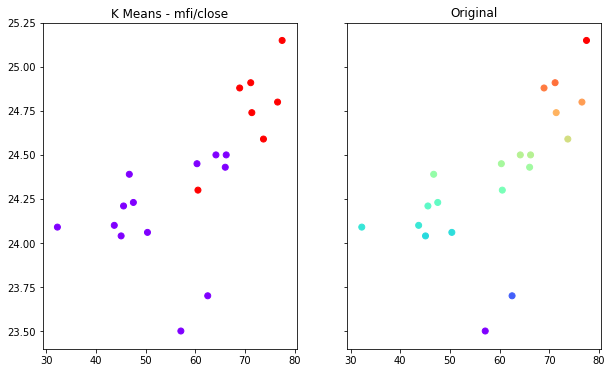

In [15]:
f, (ax3, ax4) = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10,6))
ax3.set_title('K Means - mfi/close')
ax3.scatter(n_indicators["mfi"], n_indicators["close"], c=kmeans.labels_, cmap="rainbow")
ax4.set_title("Original")
ax4.scatter(n_indicators["mfi"], n_indicators["close"], c=n_indicators["close"], cmap="rainbow")

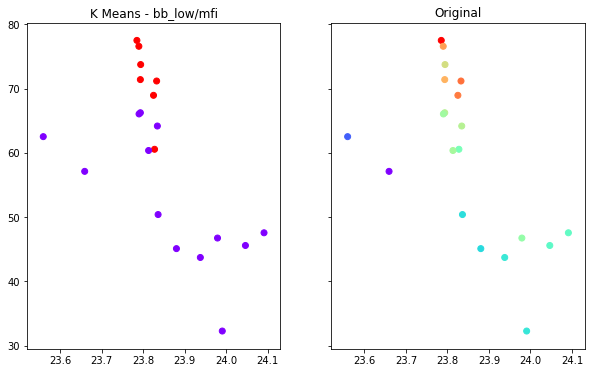

In [16]:
f, (ax5, ax6) = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10,6))
ax5.set_title('K Means - bb_low/mfi')
ax5.scatter(n_indicators["bb_low"], n_indicators["mfi"], c=kmeans.labels_, cmap="rainbow")
ax6.set_title("Original")
ax6.scatter(n_indicators["bb_low"], n_indicators["mfi"], c=n_indicators["close"], cmap="rainbow")

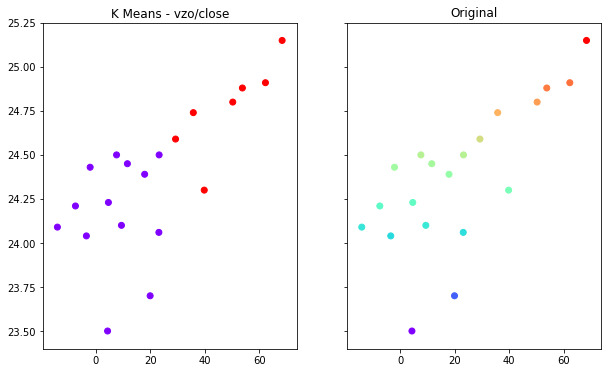

In [17]:
f, (ax7, ax8) = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10,6))
ax7.set_title('K Means - vzo/close')
ax7.scatter(n_indicators["vzo"], n_indicators["close"], c=kmeans.labels_, cmap="rainbow")
ax8.set_title("Original")
ax8.scatter(n_indicators["vzo"], n_indicators["close"], c=n_indicators["close"], cmap="rainbow")

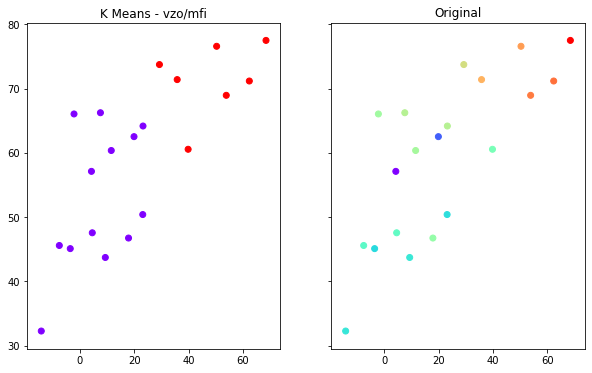

In [18]:
f, (ax9, ax10) = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10,6))
ax9.set_title('K Means - vzo/mfi')
ax9.scatter(n_indicators["vzo"], n_indicators["mfi"], c=kmeans.labels_, cmap="rainbow")
ax10.set_title("Original")
ax10.scatter(n_indicators["vzo"], n_indicators["mfi"], c=n_indicators["close"], cmap="rainbow")

In [19]:
heatmap = go.Heatmap(
    z=n_indicators.iloc[-20:].corr(method='pearson').values,
    x=n_indicators.columns,
    y=n_indicators.columns,
    colorbar=dict(title='Pearson Coefficient'),
)

layout = go.Layout(title="Pearson correlation of indicators")

heatmap['zmax'] = 1.0
heatmap['zmin'] = -1.0

fig = go.Figure(data=[heatmap], layout=layout)
py.iplot(fig)

In [20]:
heatmap = go.Heatmap(
    z=n_indicators.iloc[-20:].pct_change().corr(method='pearson').values,
    x=n_indicators.columns,
    y=n_indicators.columns,
    colorbar=dict(title='Pearson Coefficient'),
)

layout = go.Layout(title="Pearson correlation of indicator percentage changes (first in list)")

heatmap['zmax'] = 1.0
heatmap['zmin'] = -1.0

fig = go.Figure(data=[heatmap], layout=layout)
py.iplot(fig)

In [21]:
heatmap = go.Heatmap(
    z=n1_indicators.iloc[-20:].pct_change().corr(method='pearson').values,
    x=n1_indicators.columns,
    y=n1_indicators.columns,
    colorbar=dict(title='Pearson Coefficient'),
)

layout = go.Layout(title="Pearson correlation of indicator percentage changes (second in list)")

heatmap['zmax'] = 1.0
heatmap['zmin'] = -1.0

fig = go.Figure(data=[heatmap], layout=layout)
py.iplot(fig)

In [22]:
heatmap = go.Heatmap(
    z=n2_indicators.iloc[-20:].pct_change().corr(method='pearson').values,
    x=n2_indicators.columns,
    y=n2_indicators.columns,
    colorbar=dict(title='Pearson Coefficient'),
)

layout = go.Layout(title="Pearson correlation of indicator percentage changes (third in list)")

heatmap['zmax'] = 1.0
heatmap['zmin'] = -1.0

fig = go.Figure(data=[heatmap], layout=layout)
py.iplot(fig)

In [23]:
heatmap = go.Heatmap(
    z=n3_indicators.iloc[-20:].pct_change().corr(method='pearson').values,
    x=n3_indicators.columns,
    y=n3_indicators.columns,
    colorbar=dict(title='Pearson Coefficient'),
)

layout = go.Layout(title="Pearson correlation of indicator percentage changes (fourth in list)")

heatmap['zmax'] = 1.0
heatmap['zmin'] = -1.0

fig = go.Figure(data=[heatmap], layout=layout)
py.iplot(fig)

In [24]:
heatmap = go.Heatmap(
    z=n4_indicators.iloc[-20:].pct_change().corr(method='pearson').values,
    x=n4_indicators.columns,
    y=n4_indicators.columns,
    colorbar=dict(title='Pearson Coefficient'),
)

layout = go.Layout(title="Pearson correlation of indicator percentage changes (fifth in list)")

heatmap['zmax'] = 1.0
heatmap['zmin'] = -1.0

fig = go.Figure(data=[heatmap], layout=layout)
py.iplot(fig)

In [25]:
n_indicators            = pd.DataFrame()
n_indicators["open"]    = indicators[ticker_index]["open"]
n_indicators["high"]    = indicators[ticker_index]["high"]
n_indicators["low"]     = indicators[ticker_index]["low"]
n_indicators["close"]   = indicators[ticker_index]["close"]
n_indicators["macd"]    = indicators[ticker_index]["macd"]
n_indicators["signal"]  = indicators[ticker_index]["signal"]
n_indicators["mfi"]     = indicators[ticker_index]["mfi"]
n_indicators["bb_up"]   = indicators[ticker_index]["bb_up"]
n_indicators["bb_low"]  = indicators[ticker_index]["bb_low"]
n_indicators["vzo"]     = indicators[ticker_index]["vzo"]
n_indicators["apz_u"]   = indicators[ticker_index]["apz_u"]
n_indicators["apz_l"]   = indicators[ticker_index]["apz_l"]
n_indicators["stoch"]   = indicators[ticker_index]["stoch"]

# train models
close_train, close_test     = predictions.get_predictions(n_indicators["close"])
macd_train, macd_test       = predictions.get_predictions(n_indicators["macd"])
signal_train, signal_test   = predictions.get_predictions(n_indicators["signal"])
mfi_train, mfi_test         = predictions.get_predictions(n_indicators["mfi"])
stoch_train, stoch_test     = predictions.get_predictions(n_indicators["stoch"])
vzo_train, vzo_test         = predictions.get_predictions(n_indicators["vzo"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 1000 cost= 0.000119270
Epoch: 2000 cost= 0.000107318
Epoch: 3000 cost= 0.000096729
Epoch: 4000 cost= 0.000087310
Epoch: 5000 cost= 0.000078926
Epoch: 6000 cost= 0.000071458
Epoch: 7000 cost= 0.000064800
Epoch: 8000 cost= 0.000058860
Epoch: 9000 cost= 0.000053555
Epoch: 10000 cost= 0.000048813
Epoch: 11000 cost= 0.000044570
Epoch: 12000 cost= 0.000040770
Epoch: 13000 cost= 0.000037363
Epoch: 14000 cost= 0.000034303
Epoch: 15000 cost= 0.000031554
Epoch: 16000 cost= 0.000029080
Epoch: 17000 cost= 0.000026851
Epoch: 18000 cost= 0.000024840
Epoch: 19000 cost= 0.000023022
Epoch: 20000 cost= 0.000021378
Epoch: 1000 cost= nan
Epoch: 2000 cost= nan
Epoch: 3000 cost= nan
Epoch: 4000 cost= nan
Epoch: 5000 cost= nan
Epoch: 6000 cost= nan
Epoch: 7000 cost= nan
Epoch: 8000 cost= nan
Epoch: 9000 cost= nan
Epoch: 10000 cost= nan
Epoch: 11000 cost= nan
Epoch: 12000 cost= nan
Epoch: 13000 cost= nan
Epoch

/home/ben/Projects/trading/cryptoconda/src/predictor.py:69: RuntimeWarning:

invalid value encountered in greater

/home/ben/Projects/trading/cryptoconda/src/predictor.py:76: RuntimeWarning:

invalid value encountered in greater



Epoch: 1000 cost= nan
Epoch: 2000 cost= nan
Epoch: 3000 cost= nan
Epoch: 4000 cost= nan
Epoch: 5000 cost= nan
Epoch: 6000 cost= nan
Epoch: 7000 cost= nan
Epoch: 8000 cost= nan
Epoch: 9000 cost= nan
Epoch: 10000 cost= nan
Epoch: 11000 cost= nan
Epoch: 12000 cost= nan
Epoch: 13000 cost= nan
Epoch: 14000 cost= nan
Epoch: 15000 cost= nan
Epoch: 16000 cost= nan
Epoch: 17000 cost= nan
Epoch: 18000 cost= nan
Epoch: 19000 cost= nan
Epoch: 20000 cost= nan
Epoch: 1000 cost= nan
Epoch: 2000 cost= nan
Epoch: 3000 cost= nan
Epoch: 4000 cost= nan
Epoch: 5000 cost= nan
Epoch: 6000 cost= nan
Epoch: 7000 cost= nan
Epoch: 8000 cost= nan
Epoch: 9000 cost= nan
Epoch: 10000 cost= nan
Epoch: 11000 cost= nan
Epoch: 12000 cost= nan
Epoch: 13000 cost= nan
Epoch: 14000 cost= nan
Epoch: 15000 cost= nan
Epoch: 16000 cost= nan
Epoch: 17000 cost= nan
Epoch: 18000 cost= nan
Epoch: 19000 cost= nan
Epoch: 20000 cost= nan
Epoch: 1000 cost= nan
Epoch: 2000 cost= nan
Epoch: 3000 cost= nan
Epoch: 4000 cost= nan
Epoch: 500

In [26]:
close_test      = close_test[~np.isnan(close_test)]
macd_test       = macd_test[~np.isnan(macd_test)]
signal_test     = signal_test[~np.isnan(signal_test)]
mfi_test        = mfi_test[~np.isnan(mfi_test)]
stoch_test      = stoch_test[~np.isnan(stoch_test)]
vzo_test        = vzo_test[~np.isnan(vzo_test)]

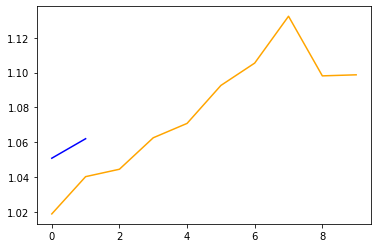

In [27]:
# close
plt.plot(np.cumprod(close_train+1), color="orange")
plt.plot(np.cumprod(close_test+1), color="blue")

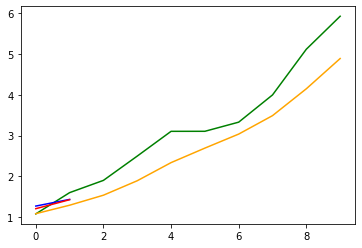

In [28]:
# macd
plt.plot(np.cumprod(macd_train+1), color="green")
plt.plot(np.cumprod(signal_train+1), color="orange")
# test
plt.plot(np.cumprod(macd_test+1), color="blue")
plt.plot(np.cumprod(signal_test+1), color="red")

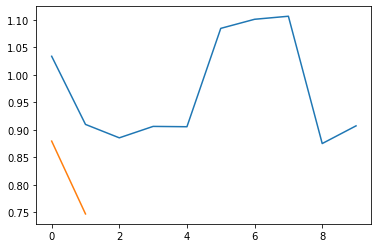

In [29]:
# MFI
plt.plot(np.cumprod(mfi_train+1))
plt.plot(np.cumprod(mfi_test+1))

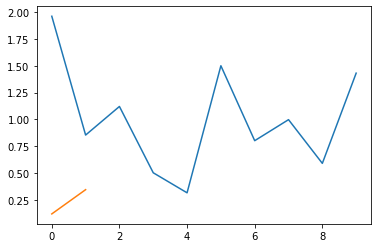

In [30]:
# stochastic oscillator  
plt.plot(np.cumprod(stoch_train+1))
plt.plot(np.cumprod(stoch_test+1))

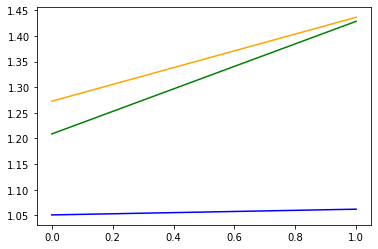

In [31]:
# macd and signal + close w/ volume
plt.plot(np.cumprod(close_test+1), color="blue")
plt.plot(np.cumprod(macd_test+1), color="orange")
plt.plot(np.cumprod(signal_test+1), color="green")
# plt.plot(np.cumprod(volume_test+1), color="black")

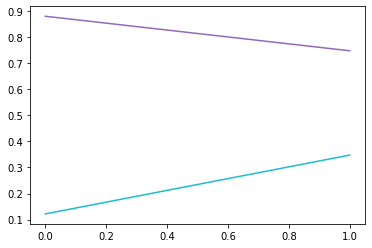

In [32]:
# stoch + mfi w/ volume
plt.plot(np.cumprod(mfi_test+1), color="#9467bd")
plt.plot(np.cumprod(stoch_test+1), color="#17becf")
# plt.plot(np.cumprod(volume_test+1), color="black")

In [33]:
print("close test:", close_test[-1], " current close:", n_indicators["close"].iloc[-1])
print("macd test:", macd_test[-1], " current macd:", n_indicators["macd"].iloc[-1])
print("signal test:", signal_test[-1], " current signal:", n_indicators["signal"].iloc[-1])
print("mfi test:", mfi_test[-1], " current mfi:", n_indicators["mfi"].iloc[-1])
print("stoch test:", stoch_test[-1], " current stoch:", n_indicators["stoch"].iloc[-1])
print("VZO test:", vzo_test[-1], " current VZO:", n_indicators["vzo"].iloc[-1])

close test: 0.0106566820276499  current close: 17.545
macd test: 0.12871237161129237  current macd: -0.5964014676458405
signal test: 0.18174180147177665  current signal: -0.3692510515419842
mfi test: -0.15039833562963195  current mfi: 28.889700319273388
stoch test: 1.8500000000000618  current stoch: 6.737588652482278
VZO test: -0.20060586408554978  current VZO: -23.40704680151687


In [34]:
# print("sentiment:", sentiment)

In [35]:
print(n_indicators["macd"].iloc[-1] < n_indicators["signal"].iloc[-1])

True


In [36]:
print(bullish_sequence(n_indicators["macd"].iloc[-5], n_indicators["macd"].iloc[-4], n_indicators["macd"].iloc[-3]))

True


In [37]:
pattern = bullish_candlestick_patterns(n_indicators.iloc[-1], n_indicators.iloc[-2], n_indicators.iloc[-3])
print("Pattern: ", pattern, pattern in ["hammer", "inverseHammer"])

Pattern:  None False


In [38]:
# empyrical stuff
from empyrical import max_drawdown, cum_returns

test_drawdown = max_drawdown(cum_returns(n_indicators["close"]))
test_drawdown1 = max_drawdown(cum_returns(n1_indicators["close"]))
test_drawdown2 = max_drawdown(cum_returns(n2_indicators["close"]))
test_drawdown3 = max_drawdown(cum_returns(n3_indicators["close"]))
test_drawdown4 = max_drawdown(cum_returns(n4_indicators["close"]))

/home/ben/anaconda3/envs/alpaca_test/lib/python3.7/site-packages/empyrical/stats.py:394: RuntimeWarning:

invalid value encountered in subtract



In [39]:
asdf = cum_returns(n_indicators["close"])

max_drawdown(asdf)

0.0

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
import json
sid = SentimentIntensityAnalyzer()

In [41]:
ticker = "ALEX"

In [42]:
results = requests.post("https://api.stocktwits.com/api/2/streams/symbol/{}.json".format(ticker))
results = json.loads(results.text)
results
bodies = "\n".join([m["body"] for m in results["messages"]])
bodies

'Oh wow this is big! $ALEX RSI Indicator left the oversold zone. View odds of uptrend. https://tickeron.com/go/881910\nLast10K highlighted 47 positive and negative remarks in $ALEX&#39;s 10-Q filed today. See them in the Quarterly Report: https://last10k.com/sec-filings/ALEX/0001545654-19-000042.htm?utm_source=stocktwits&amp;utm_medium=forum&amp;utm_campaign=sentiment&amp;utm_term=alex\n$ALEX / Alexander &amp; Baldwin files form 10-Q https://fintel.io/filings/us/alex?utm_source=stocktwits.com&amp;utm_medium=Social&amp;utm_campaign=filing\nAlexander &amp; Baldwin Holdings Just Filed Its Quarterly Report: EARNINGS PER SHARE (... http://www.conferencecalltranscripts.org/Q/summary/?id=6993435 $ALEX\n$ALEX just filed a 10-Q Quarterly Report with 79 sections and 5 exhibits. Access them all or just read their earnings: https://last10k.com/sec-filings/alex/0001545654-19-000042.htm?utm_source=stocktwits&amp;utm_medium=forum&amp;utm_campaign=10KQ2040F&amp;utm_term=alex\n$ALEX just filed a Earnin

In [43]:
# from src.sentiment_analysis import SentimentAnalysis as SA

In [44]:
# sa = SA(n_indicators, bodies).get_sentiments()

In [45]:
def get_sentiment(text):
    """Given a text block, return a sentiment score based.

    :param text:
    :return:
    """
    text_polarity   = sid.polarity_scores(text)
    print(text_polarity)

    if text_polarity["compound"] > 0.50:
        sentiment   = "positive"

    else:
        sentiment   = "negative"

    return sentiment

In [46]:
sentiment = get_sentiment(bodies)

{'neg': 0.01, 'neu': 0.934, 'pos': 0.056, 'compound': 0.9753}


In [47]:
sentiment

'positive'

And now for some fundamentals

In [48]:
tenquant_data = requests.get("https://api.tenquant.io/data?key={}&ticker={}".format(tq_key, ticker))

In [49]:
tenquant_data = json.loads(tenquant_data.text)
tenquant_data

{'assets': 2121700000.0,
 'balancesheetdate': '2019-09-30',
 'commitmentsandcontingencies': 0,
 'comprehensiveincome': -46500000.0,
 'comprehensiveincomeattributabletononcontrollinginterest': -1800000.0,
 'comprehensiveincomeattributabletoparent': -44700000.0,
 'costofrevenue': 655200000.0,
 'costsandexpenses': 354800000.0,
 'currentassets': 0,
 'currentliabilities': 0,
 'documentfiscalperiodfocus': 'Q3',
 'documentfiscalyearfocus': '2019',
 'documenttype': '10-Q',
 'duration': 3,
 'entitycentralindexkey': '0001545654',
 'entityfilercategory': 'Large Accelerated Filer',
 'entityregistrantname': 'ALEXANDER & BALDWIN, INC.',
 'equity': 1128400000.0,
 'equityattributabletononcontrollinginterest': 3600000.0,
 'equityattributabletoparent': 1124800000.0,
 'exchangegainslosses': 0,
 'extraordaryitemsgainloss': 0,
 'grossprofit': 327600000.0,
 'incomebeforeequitymethodinvestments': -49800000.0,
 'incomefromcontinuingoperationsaftertax': -42600000.0,
 'incomefromcontinuingoperationsbeforetax': 

In [68]:
backdate = time_formatter(time.time() - (604800 * 13))

In [69]:
day_bars = sa.get_barset(ticker, "day", backdate)
day_bars = sa.extract_bar_data(day_bars, ticker)

In [70]:
minute_bars = sa.get_barset(ticker, "minute", backdate)
minute_bars = sa.extract_bar_data(minute_bars, ticker)
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=False, figsize=(10,6))
ax1.set_title('K Means - macd/close')
ax1.scatter(n_indicators["macd"], n_indicators["close"], c=kmeans.labels_, cmap="rainbow")
ax2.set_title("K Means - signal/close")
ax2.scatter(n_indicators["signal"], n_indicators["close"], c=kmeans.labels_, cmap="rainbow")
ax3.set_title("Original")
ax3.scatter(n_indicators["macd"], n_indicators["close"], c=n_indicators["macd"], cmap="rainbow")
ax4.set_title("Original")
ax4.scatter(n_indicators["signal"], n_indicators["close"], c=n_indicators["signal"], cmap="rainbow")

In [78]:
minute_bars.tail(100)

,time,open,high,low,close,volume
3431,2019-10-31 15:54:00-04:00,23.470,23.490,23.470,23.490,107
3432,2019-10-31 15:55:00-04:00,23.485,23.490,23.485,23.490,202
3433,2019-10-31 15:56:00-04:00,23.490,23.505,23.490,23.505,200
3434,2019-10-31 15:58:00-04:00,23.510,23.515,23.510,23.515,106
3435,2019-10-31 15:59:00-04:00,23.515,23.530,23.500,23.500,396
...,...,...,...,...,...,...
3526,2019-11-01 15:54:00-04:00,23.675,23.675,23.675,23.675,300
3527,2019-11-01 15:55:00-04:00,23.675,23.710,23.675,23.710,200
3528,2019-11-01 15:57:00-04:00,23.720,23.720,23.715,23.715,300
3529,2019-11-01 15:58:00-04:00,23.690,23.700,23.690,23.700,103


In [79]:
alpaca_api.polygon.historic_trades(ticker, '2019-10-10', limit=10)

[Trade({   'condition1': 12,
     'condition2': 37,
     'condition3': 0,
     'condition4': 0,
     'exchange': '12',
     'price': 24.2,
     'size': 24,
     'timestamp': 1570714198312}), Trade({   'condition1': 10,
     'condition2': 41,
     'condition3': 0,
     'condition4': 0,
     'exchange': '4',
     'price': 24.28,
     'size': 349,
     'timestamp': 1570714200361}), Trade({   'condition1': 17,
     'condition2': 41,
     'condition3': 0,
     'condition4': 0,
     'exchange': '10',
     'price': 24.28,
     'size': 1916,
     'timestamp': 1570714200361}), Trade({   'condition1': 37,
     'condition2': 0,
     'condition3': 0,
     'condition4': 0,
     'exchange': '15',
     'price': 24.45,
     'size': 1,
     'timestamp': 1570714202214}), Trade({   'condition1': 14,
     'condition2': 37,
     'condition3': 41,
     'condition4': 0,
     'exchange': '10',
     'price': 24.23,
     'size': 54,
     'timestamp': 1570714229201}), Trade({   'condition1': 37,
     'condition2

In [82]:
alpaca_api.polygon.news(ticker)

[News({   'keywords': ['alex'],
     'source': 'finance yahoo',
     'summary': 'Q2 2019 Alexander & Baldwin Inc Earnings Call',
     'symbols': ['ALEX'],
     'timestamp': '2019-08-02T20:38:24.000Z',
     'title': 'Edited Transcript of ALEX earnings conference call or '
              'presentation 1-Aug-19 9:00pm GMT',
     'url': 'https://finance.yahoo.com/news/edited-transcript-alex-earnings-conference-203824896.html'}),
 News({   'image': 'https://s.yimg.com/uu/api/res/1.2/A8Du5.6Ly4B5n_w5qGj5LQ--~B/aD02MTg7dz01ODA7c209MTthcHBpZD15dGFjaHlvbg--/http://media.zenfs.com/en-US/homerun/motleyfool.com/62a1dc3478a5ad39fe4a591d8100819f',
     'keywords': ['alex'],
     'source': 'finance yahoo',
     'summary': 'ALEX earnings call for the period ending June 30, 2019.',
     'symbols': ['ALEX'],
     'timestamp': '2019-08-02T13:24:31.000Z',
     'title': 'Alexander & Baldwin (ALEX) Q2 2019 Earnings Call Transcript',
     'url': 'https://finance.yahoo.com/news/alexander-baldwin-alex-q2-2019-1

In [83]:
alpaca_api.polygon.last_trade(ticker)

Trade({'exchange': 10, 'price': 23.72, 'size': 31606, 'timestamp': 1572647400001})

In [84]:
alpaca_api.polygon.last_quote(ticker)

Quote({   'askexchange': 8,
    'askprice': 27.51,
    'asksize': 1,
    'bidexchange': 8,
    'bidprice': 0,
    'bidsize': 0,
    'timestamp': 1572638460072})

In [85]:
alpaca_api.polygon.company(ticker)

Company({   'active': True,
    'bloomberg': 'EQ0000000059366045',
    'ceo': 'Christopher J. Benjamin',
    'cik': '1545654',
    'country': 'usa',
    'description': 'Alexander & Baldwin Inc is primarily a real estate '
                   'company. It operates through three segments namely '
                   'Commercial real estate, land operations and materials and '
                   'construction. Most of its revenue is derived from managing '
                   'retail and office properties.',
    'employees': 836,
    'exchange': 'New York Stock Exchange',
    'exchangeSymbol': 'NYE',
    'figi': None,
    'hq_address': '822 Bishop Street Honolulu HI, 96801',
    'hq_country': 'USA',
    'hq_state': 'HI',
    'industry': 'REITs',
    'lei': '549300OI5H3Y0I9I4I12',
    'listdate': '1990-01-02',
    'logo': 'https://s3.polygon.io/logos/alex/logo.png',
    'marketcap': 1493121970,
    'name': 'Alexander & Baldwin Inc. REIT Holding Company',
    'phone': '+1 808 525-6611',
    's

In [86]:
alpaca_api.polygon.dividends(ticker)

[Dividend({   'amount': 15.92,
     'declaredDate': '11/16/2017',
     'exDate': '11/28/2017',
     'paymentDate': '01/23/2018',
     'qualified': 'N',
     'recordDate': '11/29/2017',
     'symbol': 'ALEX',
     'type': 'D'}), Dividend({   'amount': 15.92,
     'declaredDate': '11/16/2017',
     'exDate': '11/28/2017',
     'paymentDate': '01/23/2018',
     'qualified': 'N',
     'recordDate': '11/29/2017',
     'symbol': 'ALEX',
     'type': 'D'}), Dividend({   'amount': 0.07,
     'declaredDate': '07/25/2017',
     'exDate': '08/03/2017',
     'indicated': 0.07,
     'paymentDate': '09/07/2017',
     'qualified': 'Q',
     'recordDate': '08/07/2017',
     'symbol': 'ALEX',
     'type': 'D'}), Dividend({   'amount': 0.07,
     'declaredDate': '04/25/2017',
     'exDate': '05/04/2017',
     'indicated': 0.07,
     'paymentDate': '06/01/2017',
     'qualified': 'Q',
     'recordDate': '05/08/2017',
     'symbol': 'ALEX',
     'type': 'D'}), Dividend({   'amount': 0.07,
     'declaredDa

In [87]:
alpaca_api.polygon.financials(ticker)

[Financial({   'cashChange': -2000000,
     'cashFlow': 10900000,
     'costOfRevenue': 87100000,
     'currentAssets': 174600000,
     'currentCash': 7700000,
     'currentDebt': 37100000,
     'grossProfit': 32300000,
     'netIncome': 14800000,
     'operatingExpense': 700000,
     'operatingGainsLosses': -9400000,
     'operatingIncome': 31600000,
     'operatingRevenue': 119400000,
     'reportDate': '2018-09-30T00:00:00.000Z',
     'reportDateStr': '2018-09-30',
     'researchAndDevelopment': None,
     'shareholderEquity': 1343300000,
     'symbol': 'ALEX',
     'totalAssets': 2276200000,
     'totalCash': 7500000,
     'totalDebt': 778400000,
     'totalLiabilities': None,
     'totalRevenue': 119400000}), Financial({   'cashChange': -33900000,
     'cashFlow': 18300000,
     'costOfRevenue': 89100000,
     'currentAssets': 167100000,
     'currentCash': 9700000,
     'currentDebt': 35800000,
     'grossProfit': 23000000,
     'netIncome': 2500000,
     'operatingExpense': 8000